In [24]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_blobs
from sklearn.datasets import load_iris

# Clustering:
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN

# Métricas:
from sklearn.metrics import silhouette_score

# Reducción de dimensionalidad:
from sklearn.decomposition import PCA

import warnings


In [31]:
warnings.filterwarnings("ignore")

In [25]:
url = 'https://raw.githubusercontent.com/4GeeksAcademy/k-means-project-tutorial/main/housing.csv'

ssl_context = urllib.request.urlopen(url, context=ssl._create_unverified_context())

df = pd.read_csv(ssl_context, index_col=None)

df.to_csv('/Users/andreawendezflores/Documents/GitHub/Clustering/data/raw/california_housing_data', index=False)

In [26]:
# Visualizamos el DataFrame:
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [27]:
print(f"La dimensión del DataFrama es de {df.shape} (filas, columnas)")

La dimensión del DataFrama es de (20640, 9) (filas, columnas)


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [29]:
# Eliminamos las columnas que no nos resultan útiles: 
clean_df = df[["Latitude", "Longitude", "MedInc"]]

clean_df

,Latitude,Longitude,MedInc
0,37.88,-122.23,8.3252
1,37.86,-122.22,8.3014
2,37.85,-122.24,7.2574
3,37.85,-122.25,5.6431
4,37.85,-122.25,3.8462
...,...,...,...
20635,39.48,-121.09,1.5603
20636,39.49,-121.21,2.5568
20637,39.43,-121.22,1.7000
20638,39.43,-121.32,1.8672


In [30]:
# Observamos los valores estadísticos de nuestro conjunto de datos. 
# Por lo que parece, ya se les ha practicado previamente alguna técnica de escalamiento, por lo que no será necesario aplicar ninguna.
clean_df.describe()

,Latitude,Longitude,MedInc
count,20640.000000,20640.000000,20640.000000
mean,35.631861,-119.569704,3.870671
std,2.135952,2.003532,1.899822
min,32.540000,-124.350000,0.499900
25%,33.930000,-121.800000,2.563400
50%,34.260000,-118.490000,3.534800
75%,37.710000,-118.010000,4.743250
max,41.950000,-114.310000,15.000100


## Visualización de los datos: 

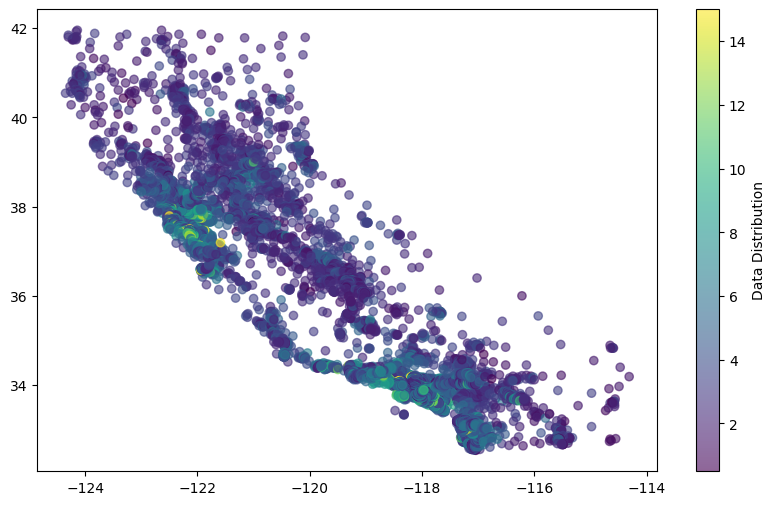

In [37]:
plt.figure(figsize=(10, 6))
plt.scatter(clean_df['Longitude'], clean_df['Latitude'], c= clean_df['MedInc'], cmap='viridis', alpha = 0.6)

cbar = plt.colorbar()
cbar.set_label('Data Distribution')

# Mostramos la gráfica: 

plt.show()

## Modelado: 

In [ ]:
# Split: dividimos nuestro conjunto de datos:

